<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/alpaca_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpaca-trade-api --quiet
!pip install pandas-ta --quiet
!pip install -U git+https://github.com/twopirllc/pandas-ta

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

In [3]:
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_ta as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
import time
import datetime
import threading
from pandas_ta.utils import get_drift, get_offset, verify_series
import talib

import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
%matplotlib inline
from sklearn.mixture import GaussianMixture
#run kmeans and gaussian and interpret, keep how many clusters i need and change
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from scipy.special import entr
import plotly.express as px
from sklearn import preprocessing
from sklearn import metrics 
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
robust_scaler = RobustScaler()
#X_train_robust = robust_scaler.fit_transform(df)

api = tradeapi.REST(key_id='PKR04JNMA7MP4CN8FW43', 
                    secret_key='6AzADTDNW3jEBb1xqxq5yuhJvJfDJeUpctv686sr', 
                    base_url='https://paper-api.alpaca.markets')

In [4]:
# define timezome and time period
NY = 'America/New_York'
start=pd.Timestamp('2020-01-01', tz=NY).isoformat()
end=pd.Timestamp('2020-10-30', tz=NY).isoformat()

In [5]:
#stockUniverse = [
df = api.get_barset([
#stocks traded by me and skyrocketing ones.                  
'GE', 'F', 'AMZN', 'TSLA', 'AAPL', 'SNAP', 'GM', 'SHOP', 'TWTR', 'AMD', 'NVDA', 'FB',
#OIL COMPANIES:
'AXAS', 'BRY',  'CDEV', 'DWSN', 'FANG', 'DMLP', 'FLMN', 'GPOR', 'LLEX', 'LONE', 'BP',
'MARPS', 'MCEP', 'NEXT', 'PTEN', 'PDCE', 'PVAC', 'RGCO', 'ROSE', 'SAEX', 'SNDE', 'TELL', 'TRCH', 'TGA', 'USEG', 'VNOM',
#PRECIOUS METALS:
'USAU', 'GOLD', 'CHNR', 'MPVD', 'OPNT', 'PAAS', 'RGLD', 'SSRM', 'WWR', 
#AIRPLANE STOCKS:
'ALGT', 'AAL', 'MESA', 'RYAAY', 'SKYW', 'SAVE', 'UAL', 'BA'
#MARINE TRANSPORTATION:
'CPLP', 'CTRM', 'EGLE', 'EDRY', 'ESEA', 'GLBS', 'GLNG', 'GOGL', 'GRIN', 'MBUU', 'MCFT', 'NMCI', 'NCLH', 'OMEX', 'PANL', 'DCIX', 'PXS', 
'SHIP', 'SBLK', 'GASS', 'TOPS', 'TRMD'
#AUTO MANUFACTURE:
'APOG', 'CAAS', 'CVGI', 'DORM', 'GNTX', 'THRM', 'IEP', 'MPAA', 'SORL', 'STRT', 'VC',
#CONFERENCING PLATFORMS: 
'ZM', 'CSCO', 'LOGM', 'MSFT', 'GOOGL', 'RNG', 
#BIOTECH STOCKS WORKING ON COVID:
'AMGN', 'ADPT', 'ALT', 'PFE', 'BNTX', 'CYDY', 'GILD', 'GSK', 'HTBX', 'INO', 'JNJ', 'TAK', 'CSLLY', 'TBIO', 'ROG', 'SNY', 'REGN', 
'NVAX', 'MRNA'],
'day', start=start, end=end).df

In [6]:
stock_list = [
#stocks traded by me and skyrocketing ones.                  
'GE', 'F', 'AMZN', 'TSLA', 'AAPL', 'SNAP', 'GM', 'SHOP', 'TWTR', 'AMD', 'NVDA', 'FB',
#OIL COMPANIES:
'AXAS', 'BRY', 'CDEV', 'DWSN', 'FANG', 'DMLP', 'FLMN', 'GPOR', 'LLEX', 'LONE', 'BP',
'MARPS', 'MCEP', 'NEXT', 'PTEN', 'PDCE', 'PVAC', 'RGCO', 'ROSE', 'SAEX', 'SNDE', 'TELL', 'TRCH', 'TGA', 'USEG', 'VNOM',
#PRECIOUS METALS:
'USAU', 'GOLD', 'CHNR', 'MPVD', 'OPNT', 'PAAS', 'RGLD', 'SSRM', 'WWR', 
#AIRPLANE STOCKS:
'ALGT', 'AAL', 'MESA', 'RYAAY', 'SKYW', 'SAVE', 'UAL', 'BA'
#MARINE TRANSPORTATION:
'CPLP', 'CTRM', 'EGLE', 'EDRY', 'ESEA', 'GLBS', 'GLNG', 'GOGL', 'GRIN', 'MBUU', 'MCFT', 'NMCI', 'NCLH', 'OMEX', 'PANL', 'DCIX', 'PXS', 
'SHIP', 'SBLK', 'GASS', 'TOPS', 'TRMD'
#AUTO MANUFACTURE:
'APOG', 'CAAS', 'CVGI', 'DORM', 'GNTX', 'THRM', 'IEP', 'MPAA', 'SORL', 'STRT', 'VC',
#CONFERENCING PLATFORMS: 
'ZM', 'CSCO', 'LOGM', 'MSFT', 'GOOGL', 'RNG', 
#BIOTECH STOCKS WORKING ON COVID:
'AMGN', 'ADPT', 'ALT', 'PFE', 'BNTX', 'CYDY', 'GILD', 'GSK', 'HTBX', 'INO', 'JNJ', 'TAK', 'CSLLY', 'TBIO', 'ROG', 'SNY', 'REGN', 
'NVAX', 'MRNA']

In [7]:
import numpy as np
from talib.abstract import *

In [8]:
inputs = {
    'open': np.random.random(422),
    'high': np.random.random(422),
    'low': np.random.random(422),
    'close': np.random.random(422),
    'volume': np.random.random(422)
}

In [ ]:
#get the metrics to cluster stocks based on them and predict the price move eventually
import warnings
warnings.filterwarnings('ignore')

for i in range (0, 50):

  stock = stock_list[i]
  print(i)
  print(len(df[stock]))
  stock_df = df[stock]
  stock_df['symbol'] = stock



#relative strength index - a momentum indicator that measures the 
#magnitude of recent price changes in order to evaluate overbought or 
#oversold conditions in the price of a stock or other asset.
  stock_df['rsi'] = 0
  rsi=talib.RSI(np.array(stock_df.close.values,dtype=float),14) 
  stock_df['rsi'] = rsi


#simple moving average - each value in the time period carries equal weight, 
#and values outside of the time period are not included in the average.
  stock_df['sma'] = 0
  sma = talib.SMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['sma'] = sma

  #exponential moving average - is a cumulative calculation, including all data.
  stock_df['ema'] = 0
  ema = talib.EMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['ema'] = ema

  stock_df['midpoint'] = 0
  midpoint = talib.MIDPOINT(np.array(stock_df.close.values,dtype=float),14)
  stock_df['midpoint'] = midpoint

  #coomodity channel index -  to determine overbought and oversold levels.
  stock_df['cci'] = 0
  cci = talib.CCI(np.array(stock_df.high.values, dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float),14)
  stock_df['cci'] = cci

  #On-balance volume, intended to relate price and volume in the stock market. OBV is based on a cumulative total volume
  stock_df['obv'] = 0
  obv = talib.OBV(np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['obv'] = obv

  #The Balance of Power indicator measures the market strength of buyers against sellers by assessing the ability of each side to drive prices to an extreme level.
  stock_df['bop'] = 0
  bop = talib.BOP(np.array(stock_df.open.values, dtype=float), np.array(stock_df.high.values, dtype=float),  np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float))
  stock_df['bop'] = bop
  
  #The Money Flow Index (MFI) is a technical indicator that generates overbought or oversold signals using both prices and volume data. 
  #An MFI reading above 80 is considered overbought and an MFI reading below 20 is considered oversold, although levels of 90 and 10 are also used as thresholds
  stock_df['mfi'] = 0
  mfi = talib.MFI(np.array(stock_df.high.values,dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['mfi'] = mfi

  df_orig = df.copy() #has a symbol inside


  stock_df['prev_day'] = stock_df['close'].shift(periods=1)
  return_ = (stock_df['close'] - stock_df['prev_day'])/stock_df['prev_day']

  

  drop_cols = ['symbol']
  stock_df.drop(drop_cols, axis = 1, inplace=True)
  stock_df.head()

  #close price and ema are highly correlated, will take the difference and create a new column for it
  dif_close_ema = stock_df['close'] - stock_df['ema']
  dif_close_ema

  #adding the new cols to the DF
  stock_df['dif_close_ema'] = dif_close_ema.tolist()

  #stock_df.dropna(inplace=True)

  #scaling the stock prices to compare them better with each other.
  scaler = StandardScaler()
  scaled = scaler.fit_transform(stock_df)
  df_scaled = pd.DataFrame(scaled, columns=stock_df.columns)
  df_scaled.head()

  #stock_df['return'] = 0
  #stock_df['return'] = return_.values

  #return = (close previous day - close today)/close previos day
  df_scaled['return'] = 0
  df_scaled['return'] = return_.values

  #df_scaled.dropna(inplace=True)
  
  if i == 0:
    df_all = df_scaled #for one stock
  else: 
    frames = [df_all, df_scaled] 
    df_all = pd.concat(frames) #for all stocks


In [10]:
df_all.dropna(inplace=True)
df_all.head()

,open,high,low,close,volume,rsi,sma,ema,midpoint,cci,obv,bop,mfi,prev_day,dif_close_ema,return
14,1.729896,1.705931,1.770428,1.769241,-0.253215,-0.049632,1.969874,2.002337,1.969336,-0.481513,1.577465,0.545418,0.376388,1.579176,0.118144,0.036060
15,1.797651,1.723930,1.781823,1.737570,-0.490473,-0.194297,1.960981,1.992328,1.969336,-0.425174,1.477785,-0.945102,-0.399603,1.764258,0.036272,-0.005942
16,1.603420,1.587583,1.672432,1.615409,-1.184850,-0.707064,1.937039,1.966092,1.961938,-1.307496,1.438066,0.104264,-1.053182,1.732659,-0.321475,-0.023057
17,1.635039,1.692431,1.713454,1.746619,-1.031556,-0.006650,1.925923,1.962217,1.961938,-0.378458,1.491022,1.274554,-1.121610,1.610776,0.171493,0.025350
18,2.109324,2.223420,2.178366,2.294083,0.521919,1.790472,1.960468,2.037561,2.166615,2.989488,1.678124,1.501081,0.058659,1.741687,1.917972,0.103154


In [11]:
df_scaled

,open,high,low,close,volume,rsi,sma,ema,midpoint,cci,obv,bop,mfi,prev_day,dif_close_ema,return
0,2.278158,2.260484,2.308081,2.239354,-0.637313,NaN,NaN,NaN,NaN,NaN,0.742458,-0.540789,NaN,NaN,NaN,NaN
1,2.171243,2.133421,2.179919,2.173117,-0.617896,NaN,NaN,NaN,NaN,NaN,0.696114,-0.020692,NaN,2.233171,NaN,-0.014723
2,2.074510,2.087678,2.174792,2.091595,-0.655698,NaN,NaN,NaN,NaN,NaN,0.657625,0.131003,NaN,2.167025,NaN,-0.018391
3,2.074510,2.041884,2.174792,2.117071,-0.720363,NaN,NaN,NaN,NaN,NaN,0.682676,0.720723,NaN,2.085615,NaN,0.005855
4,2.069419,2.158833,2.185045,2.162927,-0.621074,NaN,NaN,NaN,NaN,NaN,0.728360,1.055619,NaN,2.111055,NaN,0.010477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,-0.455819,-0.532368,-0.424336,-0.491649,-0.562260,NaN,NaN,NaN,-0.533220,0.619252,0.804065,-1.306255,1.340931,-0.382138,NaN,-0.059621
207,-0.472213,-0.556358,-0.444842,-0.512030,-0.521437,NaN,NaN,NaN,-0.437791,0.086750,0.737675,-1.494506,1.263924,-0.494077,NaN,-0.011527
208,-0.562734,-0.646725,-0.567877,-0.624123,-0.368554,NaN,NaN,NaN,-0.482699,-1.658917,0.639517,-1.379755,0.784039,-0.514430,NaN,-0.064140
209,-0.659467,-0.703192,-0.598636,-0.629219,-0.013488,NaN,NaN,NaN,-0.510766,-1.971455,0.467574,0.435293,-0.482407,-0.626369,NaN,-0.003115


In [12]:
df_orig 

AAL                  ...        ZM                   
                            open     high    low  ...       low   close     volume
time                                              ...                             
2020-01-02 05:00:00+00:00  28.98  29.2950  28.65  ...   68.0200   68.64  1285006.0
2020-01-03 05:00:00+00:00  28.27  28.2900  27.34  ...   67.1000   67.28  1080659.0
2020-01-06 05:00:00+00:00  27.19  27.4901  27.08  ...   65.8116   70.32  2969660.0
2020-01-07 05:00:00+00:00  27.56  27.6800  27.06  ...   69.3700   71.90  6909601.0
2020-01-08 05:00:00+00:00  27.21  28.0900  27.10  ...   71.0300   72.55  2389283.0
...                          ...      ...    ...  ...       ...     ...        ...
2020-10-26 04:00:00+00:00  12.39  12.4500  11.67  ...  510.3100  517.79  9802120.0
2020-10-27 04:00:00+00:00  11.78  11.7900  11.20  ...  513.3000  538.99  6798844.0
2020-10-28 04:00:00+00:00  10.89  11.1600  10.63  ...  511.5001  515.59  8239325.0
2020-10-29 04:00:00+00:00  10.96  11.2900  10.89  ...  483.5000  489.84  8824814.0
2020-10-30 04:00:00+00:00  11.06  11.4150  10.98  ...  457.0201  460.90  8408056.0

[211 rows x 555 columns]

In [13]:
stock_df['return'] = (stock_df['close'] - stock_df['prev_day'])/stock_df['prev_day']

In [14]:
stock_df['prev_day'] = stock_df['close'].shift(periods=1)


In [15]:
stock_df

,open,high,low,close,volume,rsi,sma,ema,midpoint,cci,obv,bop,mfi,prev_day,dif_close_ema,return
time,,,,,,,,,,,,,,,,
2020-01-02 05:00:00+00:00,8.9600,9.1000,8.78,8.83,223932.0,NaN,NaN,NaN,NaN,NaN,223932.0,-0.406250,NaN,NaN,NaN,NaN
2020-01-03 05:00:00+00:00,8.7500,8.8500,8.53,8.70,245288.0,NaN,NaN,NaN,NaN,NaN,-21356.0,-0.156250,NaN,8.83,NaN,-0.014723
2020-01-06 05:00:00+00:00,8.5600,8.7600,8.52,8.54,203711.0,NaN,NaN,NaN,NaN,NaN,-225067.0,-0.083333,NaN,8.70,NaN,-0.018391
2020-01-07 05:00:00+00:00,8.5600,8.6699,8.52,8.59,132590.0,NaN,NaN,NaN,NaN,NaN,-92477.0,0.200133,NaN,8.54,NaN,0.005855
2020-01-08 05:00:00+00:00,8.5500,8.9000,8.54,8.68,241792.0,NaN,NaN,NaN,NaN,NaN,149315.0,0.361111,NaN,8.59,NaN,0.010477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26 04:00:00+00:00,3.5900,3.6050,3.45,3.47,306479.0,NaN,NaN,NaN,3.405,25.281951,549996.0,-0.774194,68.521328,3.69,NaN,-0.059621
2020-10-27 04:00:00+00:00,3.5578,3.5578,3.41,3.43,351378.0,NaN,NaN,NaN,3.575,-30.211766,198618.0,-0.864682,67.229713,3.47,NaN,-0.011527
2020-10-28 04:00:00+00:00,3.3800,3.3800,3.17,3.21,519525.0,NaN,NaN,NaN,3.495,-212.133154,-320907.0,-0.809524,59.180715,3.43,NaN,-0.064140


In [16]:
print(df_orig.keys())

MultiIndex([( 'AAL',   'open'),
            ( 'AAL',   'high'),
            ( 'AAL',    'low'),
            ( 'AAL',  'close'),
            ( 'AAL', 'volume'),
            ('AAPL',   'open'),
            ('AAPL',   'high'),
            ('AAPL',    'low'),
            ('AAPL',  'close'),
            ('AAPL', 'volume'),
            ...
            ( 'WWR',   'open'),
            ( 'WWR',   'high'),
            ( 'WWR',    'low'),
            ( 'WWR',  'close'),
            ( 'WWR', 'volume'),
            (  'ZM',   'open'),
            (  'ZM',   'high'),
            (  'ZM',    'low'),
            (  'ZM',  'close'),
            (  'ZM', 'volume')],
           length=555)


In [17]:
df_all.isnull().sum()
#check for null values

open             0
high             0
low              0
close            0
volume           0
rsi              0
sma              0
ema              0
midpoint         0
cci              0
obv              0
bop              0
mfi              0
prev_day         0
dif_close_ema    0
return           0
dtype: int64

In [18]:
df_all.info()
#check if all is a numerical data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8425 entries, 14 to 154
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           8425 non-null   float64
 1   high           8425 non-null   float64
 2   low            8425 non-null   float64
 3   close          8425 non-null   float64
 4   volume         8425 non-null   float64
 5   rsi            8425 non-null   float64
 6   sma            8425 non-null   float64
 7   ema            8425 non-null   float64
 8   midpoint       8425 non-null   float64
 9   cci            8425 non-null   float64
 10  obv            8425 non-null   float64
 11  bop            8425 non-null   float64
 12  mfi            8425 non-null   float64
 13  prev_day       8425 non-null   float64
 14  dif_close_ema  8425 non-null   float64
 15  return         8425 non-null   float64
dtypes: float64(16)
memory usage: 1.1 MB


In [19]:
keep_cols = ['close', 'volume', 'rsi', 'sma', 'ema', 'midpoint', 'bop',	'cci', 'obv', 'dif_close_ema', 'mfi' ]
df_all=df_all[keep_cols]
df_all.head()
#keeping columns I need for futher work

,close,volume,rsi,sma,ema,midpoint,bop,cci,obv,dif_close_ema,mfi
14,1.769241,-0.253215,-0.049632,1.969874,2.002337,1.969336,0.545418,-0.481513,1.577465,0.118144,0.376388
15,1.737570,-0.490473,-0.194297,1.960981,1.992328,1.969336,-0.945102,-0.425174,1.477785,0.036272,-0.399603
16,1.615409,-1.184850,-0.707064,1.937039,1.966092,1.961938,0.104264,-1.307496,1.438066,-0.321475,-1.053182
17,1.746619,-1.031556,-0.006650,1.925923,1.962217,1.961938,1.274554,-0.378458,1.491022,0.171493,-1.121610
18,2.294083,0.521919,1.790472,1.960468,2.037561,2.166615,1.501081,2.989488,1.678124,1.917972,0.058659


In [20]:
df_all.corr()
#correlation check

,close,volume,rsi,sma,ema,midpoint,bop,cci,obv,dif_close_ema,mfi
close,1.000000,-0.131169,0.247346,0.875087,0.903679,0.904031,0.029898,0.139393,0.540697,0.236039,0.116672
volume,-0.131169,1.000000,0.098218,-0.184898,-0.181298,-0.161876,0.047200,0.194840,-0.083730,0.113100,0.131104
rsi,0.247346,0.098218,1.000000,-0.093024,-0.060284,-0.059987,0.229393,0.764250,0.332927,0.856369,0.702616
sma,0.875087,-0.184898,-0.093024,1.000000,0.993896,0.966285,-0.070405,-0.187153,0.422541,-0.191600,-0.135155
ema,0.903679,-0.181298,-0.060284,0.993896,1.000000,0.966510,-0.065523,-0.140617,0.431281,-0.136803,-0.107647
midpoint,0.904031,-0.161876,-0.059987,0.966285,0.966510,1.000000,-0.061092,-0.142582,0.447441,-0.132214,-0.107848
bop,0.029898,0.047200,0.229393,-0.070405,-0.065523,-0.061092,1.000000,0.233682,0.030198,0.265038,0.098911
cci,0.139393,0.194840,0.764250,-0.187153,-0.140617,-0.142582,0.233682,1.000000,0.148887,0.749762,0.616248
obv,0.540697,-0.083730,0.332927,0.422541,0.431281,0.447441,0.030198,0.148887,1.000000,0.258212,0.230779
dif_close_ema,0.236039,0.113100,0.856369,-0.191600,-0.136803,-0.132214,0.265038,0.749762,0.258212,1.000000,0.610636


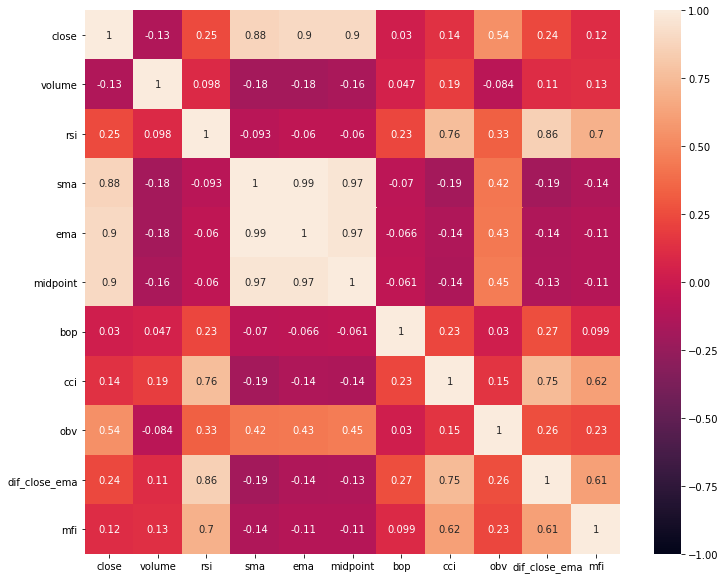

In [21]:
#let's use the visuals - the heatmap to see the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

#lot's of correlated data: sma, ema, midpoint, rsi, cci, will drop them

In [22]:
#Dropped. Left with cols I'll work
drop_cols = ['ema', 'midpoint', 'rsi', 'sma', 'cci', 'close', 'dif_close_ema']
df_all.drop(drop_cols, axis = 1, inplace=True)
df_all.head()

,volume,bop,obv,mfi
14,-0.253215,0.545418,1.577465,0.376388
15,-0.490473,-0.945102,1.477785,-0.399603
16,-1.184850,0.104264,1.438066,-1.053182
17,-1.031556,1.274554,1.491022,-1.121610
18,0.521919,1.501081,1.678124,0.058659


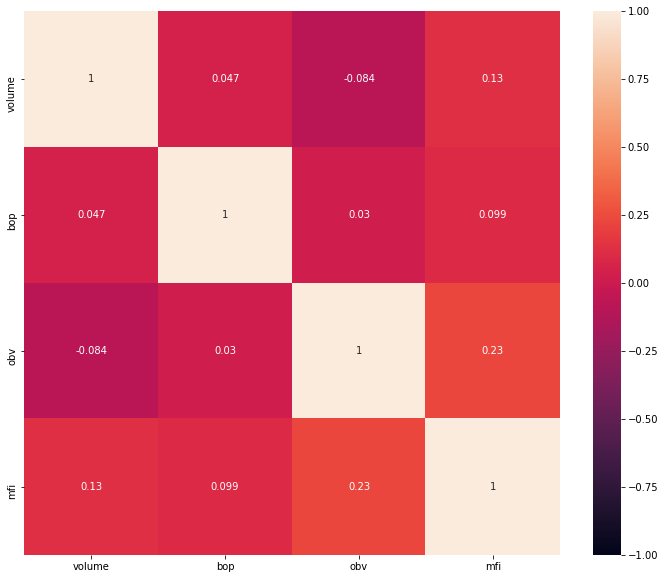

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [24]:
df_scaled.shape

(211, 16)

In [25]:
X = df_all #the features to predict the value

In [26]:
X

,volume,bop,obv,mfi
14,-0.253215,0.545418,1.577465,0.376388
15,-0.490473,-0.945102,1.477785,-0.399603
16,-1.184850,0.104264,1.438066,-1.053182
17,-1.031556,1.274554,1.491022,-1.121610
18,0.521919,1.501081,1.678124,0.058659
...,...,...,...,...
150,-0.460394,0.464398,0.028690,-1.027597
151,-0.330249,0.784458,0.134809,-0.520375
152,0.093958,1.383088,0.329079,0.255791
153,1.611391,-0.735826,0.838678,1.322716


In [27]:
#getting the elbow plot to see what might be the right number of clusters

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20)

for k in K: #Building and fitting the model kmeanModel = KMeans(n_clusters=k).fit(X) kmeanModel.fit(X)
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                  'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
             'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_

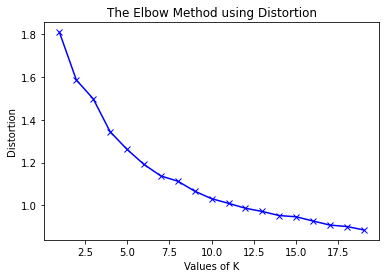

In [28]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

#will try between 5 and 10

In [29]:
kmeans = KMeans(n_clusters = 7, random_state=55)
kmeans.fit(X)
y_pred = kmeans.predict(X)
print(y_pred)

[1 0 0 ... 1 5 1]


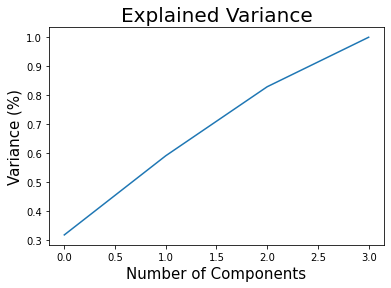

In [30]:
from sklearn.decomposition import PCA

# pass through the scaled data set into our PCA class object
pca = PCA().fit(X)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

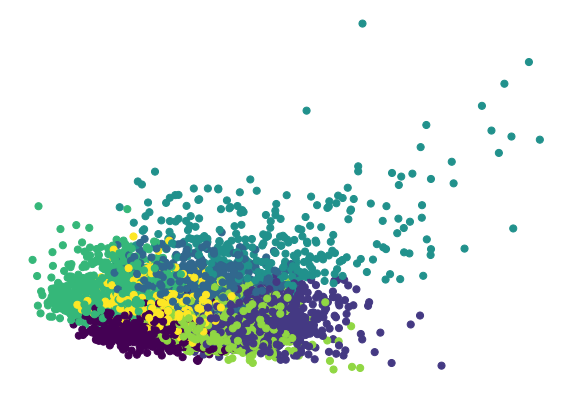

In [31]:
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(10,7))
colours = 'rbgymrck'
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred, s=50, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [32]:
from sklearn import datasets, metrics
print(metrics.silhouette_score(X, y_pred, metric='euclidean')) 
#silhouette score gave the best result at number of clusters = 7, from 2 to 6 performed poorly.

0.21458616976473419


In [33]:
from sklearn.decomposition import PCA

In [34]:
#number of labels and their values
pd.Series(kmeans.labels_).value_counts() 

5    1564
4    1486
1    1400
2    1227
6    1226
0    1204
3     318
dtype: int64

In [35]:
# adding a label to a df_all
df_all['label'] = kmeans.labels_ 
df_all['label'] = df_all['label'].astype(str)

In [36]:
centroids = df_all.groupby(['label']).mean() 
#grouping by label, shows avg 

In [37]:
centroids.style.background_gradient() 

,volume,bop,obv,mfi
label,,,,
0,-0.359922,-0.674124,0.686409,-0.687097
1,-0.095954,0.966205,0.785295,0.790109
2,0.110835,0.653703,-0.975947,0.585906
3,3.794578,0.177968,-0.102655,0.584860
4,0.068192,-0.804231,-1.001559,-0.767434
5,-0.122527,-0.845820,0.375514,0.908284
6,-0.221515,0.979883,-0.187747,-0.931703


In [38]:
#df_orig[df_all['label'] == '1']


In [39]:
import umap
import time

In [40]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.4,
                      metric='euclidean').fit_transform(df_all)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 22.082513093948364 seconds


In [41]:
kmeans = KMeans(n_clusters = 7, random_state=55)
kmeans.fit(umap_results)
y_pred = kmeans.predict(umap_results)
print(y_pred)

[4 0 0 ... 4 2 4]


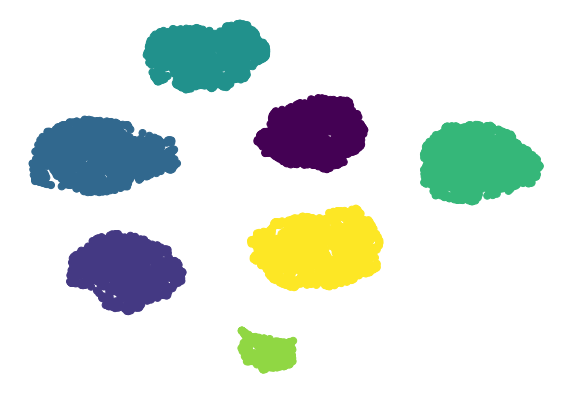

In [42]:
plt.figure(figsize=(10,7))
colours = 'rbgymrckw'
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=y_pred, s=50, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [43]:
from sklearn import datasets, metrics
print(metrics.silhouette_score(X, y_pred, metric='euclidean')) 

0.41850096802675796


In [44]:
pd.Series(kmeans.labels_).value_counts() 

2    1564
6    1485
4    1400
1    1227
3    1226
0    1204
5     319
dtype: int64

In [45]:
centroids = df_all.groupby(['label']).mean() 
#grouping by label, shows avg 

In [46]:
centroids.style.background_gradient() 

,volume,bop,obv,mfi
label,,,,
0,-0.359922,-0.674124,0.686409,-0.687097
1,-0.095954,0.966205,0.785295,0.790109
2,0.110835,0.653703,-0.975947,0.585906
3,3.794578,0.177968,-0.102655,0.584860
4,0.068192,-0.804231,-1.001559,-0.767434
5,-0.122527,-0.845820,0.375514,0.908284
6,-0.221515,0.979883,-0.187747,-0.931703


We will look at the best cluster with the better metric params for going long(stock price goes up) as opposite to short(when betting that the price will go down).

MFI - Money flow is calculated by averaging the high, low and closing prices, and multiplying by the daily volume. Comparing that result with the number for the previous day tells traders whether money flow was positive or negative for the current day.

OBV - on-balance volume. The formula generates a smooth indicator line that carves out highs, lows, and trendlines similar to price bars.  Generates more actionable signals than the green or red volume histogram. 

BOP - measures the market strength of buyers against sellers by assessing the ability of each side to drive prices to an extreme level.

VOLUME - trading volume is a measure of how much of a given financial asset has traded in a period of time. For stocks, volume is measured in the number of shares traded.

In [47]:
#quality of clusters:
centroids['quality'] = 0
centroids['quality'] = centroids['obv'] + centroids['bop'] - centroids['mfi']
print(centroids)

#higher the value the better

         volume       bop       obv       mfi   quality
label                                                  
0     -0.359922 -0.674124  0.686409 -0.687097  0.699382
1     -0.095954  0.966205  0.785295  0.790109  0.961390
2      0.110835  0.653703 -0.975947  0.585906 -0.908150
3      3.794578  0.177968 -0.102655  0.584860 -0.509547
4      0.068192 -0.804231 -1.001559 -0.767434 -1.038356
5     -0.122527 -0.845820  0.375514  0.908284 -1.378589
6     -0.221515  0.979883 -0.187747 -0.931703  1.723838


In [48]:
from sklearn.manifold import TSNE

In [49]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(df_all)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8425 samples in 0.011s...
[t-SNE] Computed neighbors for 8425 samples in 0.542s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8425
[t-SNE] Computed conditional probabilities for sample 2000 / 8425
[t-SNE] Computed conditional probabilities for sample 3000 / 8425
[t-SNE] Computed conditional probabilities for sample 4000 / 8425
[t-SNE] Computed conditional probabilities for sample 5000 / 8425
[t-SNE] Computed conditional probabilities for sample 6000 / 8425
[t-SNE] Computed conditional probabilities for sample 7000 / 8425
[t-SNE] Computed conditional probabilities for sample 8000 / 8425
[t-SNE] Computed conditional probabilities for sample 8425 / 8425
[t-SNE] Mean sigma: 0.315269
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.674728
[t-SNE] KL divergence after 500 iterations: 1.325273
t-SNE done! Time elapsed: 38.71380424499512 seconds


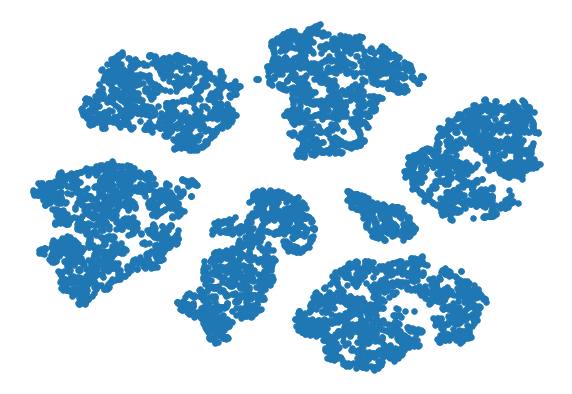

In [50]:
plt.figure(figsize=(10,7))
colours = 'rbgym'
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=30, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
#no clustering yet, just in 2 dimensions

In [51]:
kmeans = KMeans(n_clusters = 7, random_state=55)
kmeans.fit(tsne_results)
y_pred = kmeans.predict(tsne_results)
print(y_pred)

[2 5 5 ... 2 3 2]


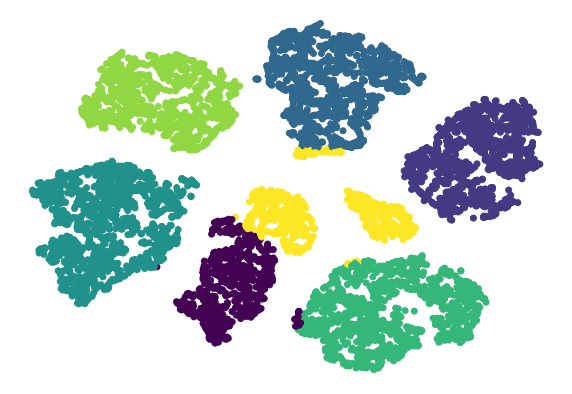

In [52]:
#tsne = PCA(n_components=2).fit_transform(tsne_results)

plt.figure(figsize=(10,7))
colours = 'rbgymrc' #kp'
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_pred, #s=50, 
            cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [53]:
from sklearn import datasets, metrics
print(metrics.silhouette_score(X, y_pred, metric='euclidean')) 

0.3526769910257411


In [54]:
pd.Series(kmeans.labels_).value_counts() 


3    1563
4    1458
2    1343
1    1227
5    1204
0     838
6     792
dtype: int64

In [55]:
centroids = df_all.groupby(['label']).mean() #grouping by label, shows avg 

In [56]:
centroids.style.background_gradient() 

,volume,bop,obv,mfi
label,,,,
0,-0.359922,-0.674124,0.686409,-0.687097
1,-0.095954,0.966205,0.785295,0.790109
2,0.110835,0.653703,-0.975947,0.585906
3,3.794578,0.177968,-0.102655,0.584860
4,0.068192,-0.804231,-1.001559,-0.767434
5,-0.122527,-0.845820,0.375514,0.908284
6,-0.221515,0.979883,-0.187747,-0.931703


In [57]:
from sklearn.cluster import KMeans
from sklearn import metrics

# define a dictionary that contains all of our relevant info.
results_dict = {}

# define how many clusters we want to test up to.
num_of_clusters = 15

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

#the more the clusters the worse the result

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.4343978374486639
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.3619091264060293
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.3472606627696693
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.3801329020915822
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.40785723139517505
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.4185203725359285
---------------------------------------

Model Evaluation. The yellowbrick library, we get to access the SilhouetterVisualizer which will help visualize the silhouette score for each point in that particular cluster. What we are looking for is that each cluster exceeds the red line or the average silhouette score and that the clusters are as evenly distributed as possible. The clusters below 0 or above are outliers that are tricky to group.

----------------------------------------------------------------------------------------------------


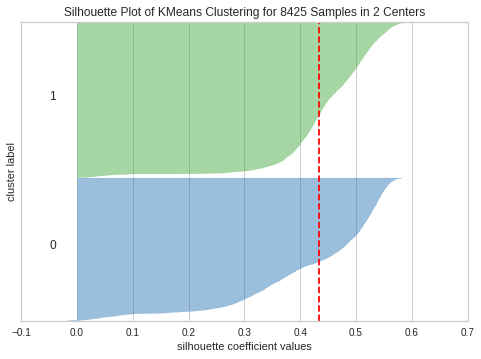

----------------------------------------------------------------------------------------------------


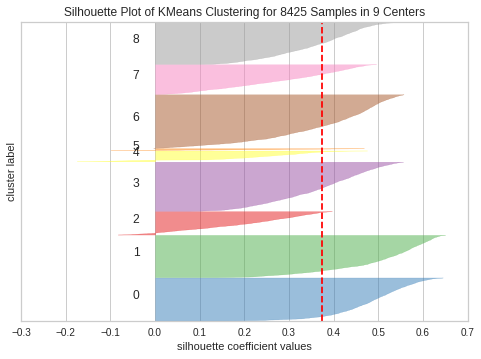

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,9]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=55)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(X)

    # show the chart
    visualizer.poof()

----------------------------------------------------------------------------------------------------


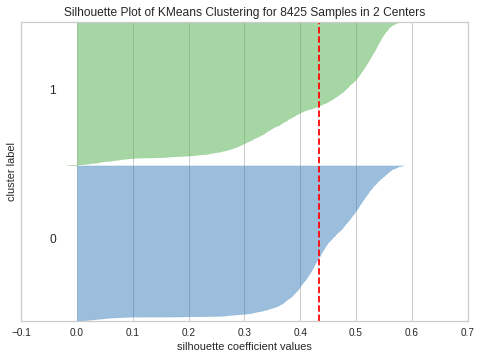

----------------------------------------------------------------------------------------------------


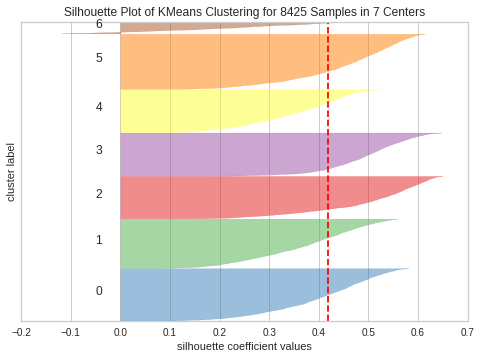

In [59]:
clusters = [2,7]

for cluster in clusters:

    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(X)

    # show the chart
    visualizer.poof()

In [ ]:
list(df_all.index.values.tolist())

In [61]:
from ipywidgets import interact

In [62]:
px.scatter(data_frame=df_all, x='volume', y='mfi', color = 'label', hover_data=['bop', 'obv'])

In [63]:
'''@interact
def plotting(x=df_orig.columns, y = df_orig.columns):
    fig = px.scatter(data_frame=df_orig, x= bop, y= y, color = 'cluster', hover_data=['label', 'mfi', 'volume'])
    fig.show()'''

"@interact\ndef plotting(x=df_orig.columns, y = df_orig.columns):\n    fig = px.scatter(data_frame=df_orig, x= bop, y= y, color = 'cluster', hover_data=['label', 'mfi', 'volume'])\n    fig.show()"

<Figure size 648x504 with 0 Axes>

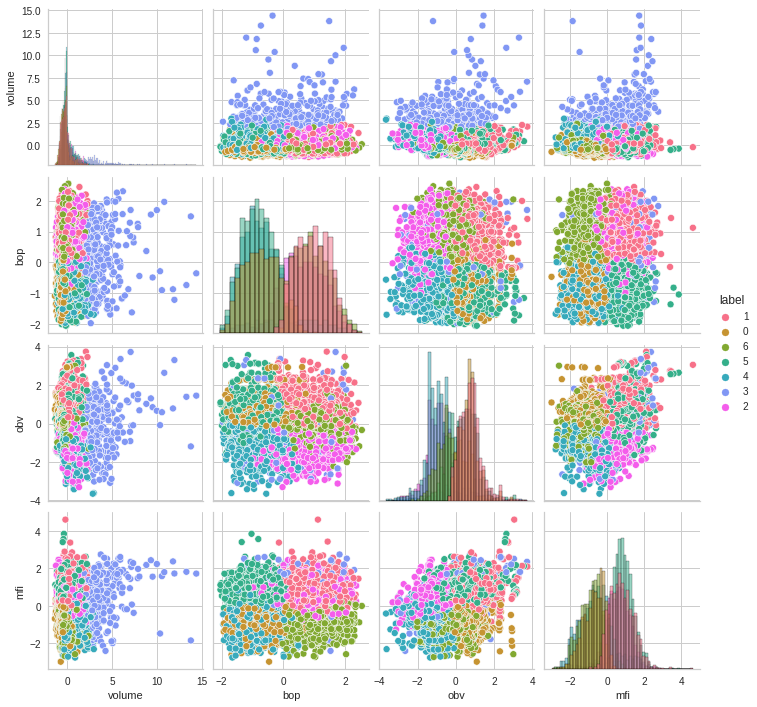

<Figure size 648x504 with 0 Axes>

In [64]:
sns.pairplot(df_all, hue="label", diag_kind="hist")
plt.figure(figsize=(9,7))
#very interesting.. We can actually see the clusters very distintcly at some plots.
#amazing tool for futher investigation. 
#cluster 3 is rich on volume, which means stocks are actively traded. Many outliers too. I'll look more in depth in this cluster
#X

In [65]:
#building a model:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score

In [66]:
df_scaled.dropna(inplace=True)

In [67]:
df_all

,volume,bop,obv,mfi,label
14,-0.253215,0.545418,1.577465,0.376388,1
15,-0.490473,-0.945102,1.477785,-0.399603,0
16,-1.184850,0.104264,1.438066,-1.053182,0
17,-1.031556,1.274554,1.491022,-1.121610,6
18,0.521919,1.501081,1.678124,0.058659,1
...,...,...,...,...,...
150,-0.460394,0.464398,0.028690,-1.027597,6
151,-0.330249,0.784458,0.134809,-0.520375,6
152,0.093958,1.383088,0.329079,0.255791,1
153,1.611391,-0.735826,0.838678,1.322716,5


In [68]:
#X = bop, mfi, obv
y = df_scaled['return']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[['volume','bop','obv','mfi']].to_numpy(),y, test_size = 0.2, random_state = 55)

In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [71]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
#print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.49857184291312184
-----Test set statistics-----
R-squared of the model in test set is: 0.599390123217209
Mean absolute error of the prediction is: 0.037469917779270875
Mean squared error of the prediction is: 0.0021147814504063047
Mean absolute percentage error of the prediction is: 178.8780678231174


In [72]:
#PLOT active stocks, can actually plot each stock in the list to see the performance. Here I'm looking at GE. It's volume is very 
#high and the price dropped a lot this past year. It has good fundamentals and the price is at 'sale', so good to look at it 
#as a potential buy.

In [73]:
df = api.get_barset(['GE'], 'day', start=start, end=end).df
df.head()

GE                                 
                            open    high    low   close    volume
time                                                             
2020-01-02 00:00:00-05:00  11.23  11.955  11.23  11.940  72456864
2020-01-03 00:00:00-05:00  11.57  12.000  11.53  11.970  72496606
2020-01-06 00:00:00-05:00  11.84  12.210  11.84  12.140  88077970
2020-01-07 00:00:00-05:00  12.15  12.235  11.92  12.055  60689070
2020-01-08 00:00:00-05:00  11.99  12.050  11.87  11.930  37395174

In [74]:
#plot the GE stock from the beginning of the year to nowdays. 

In [75]:
GE_df = df['GE']

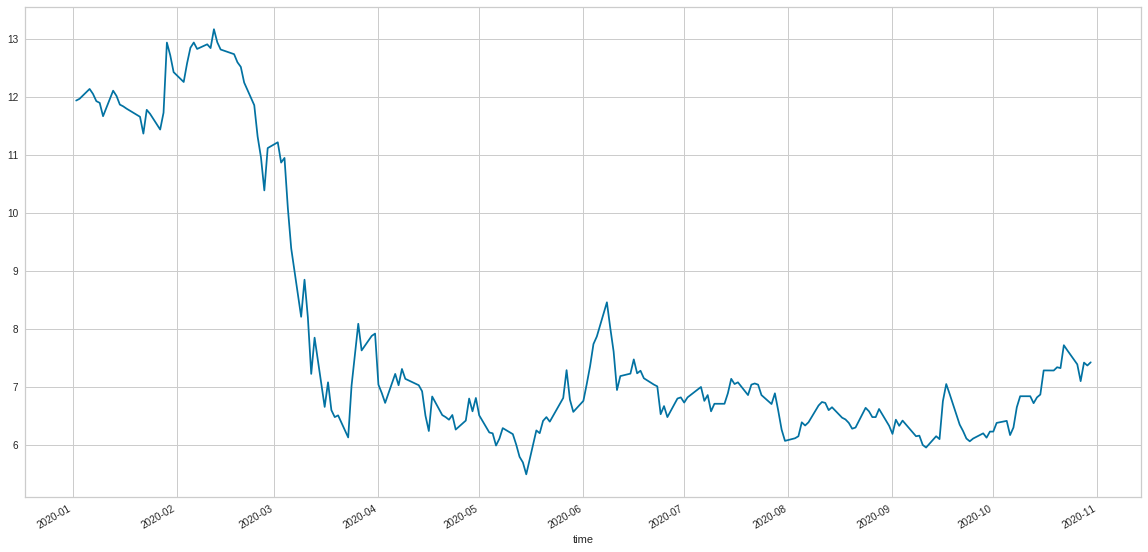

In [76]:
GE_df['close'].plot(figsize=(20,10))

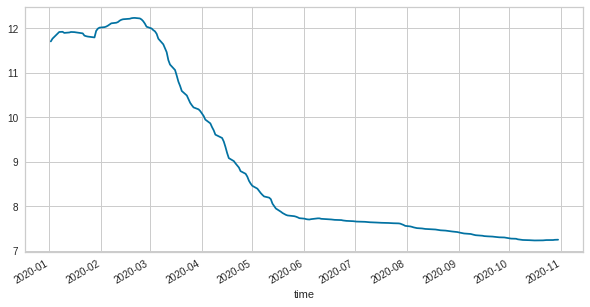

In [77]:
GE_df['RSI'] = GE_df.ta.vwap(high='high', low='low', close='close', volume='volume')
GE_df['RSI'].plot(figsize=(10, 5))
#this plot shows that MFI is very low

In [78]:
GE_df['close'].rolling(window=20).mean()
GE_df['close'].rolling(window=50).mean()
GE_df['close'].rolling(window=100).mean()
GE_df['close'].rolling(window=200).mean()
GE_df.head()

,open,high,low,close,volume,RSI
time,,,,,,
2020-01-02 00:00:00-05:00,11.23,11.955,11.23,11.940,72456864,11.708333
2020-01-03 00:00:00-05:00,11.57,12.000,11.53,11.970,72496606,11.770850
2020-01-06 00:00:00-05:00,11.84,12.210,11.84,12.140,88077970,11.881399
2020-01-07 00:00:00-05:00,12.15,12.235,11.92,12.055,60689070,11.920368
2020-01-08 00:00:00-05:00,11.99,12.050,11.87,11.930,37395174,11.923715


Text(0.5, 1.0, 'GE Cumulative Returns')

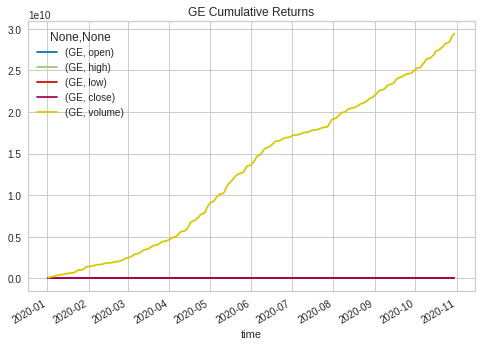

In [79]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('GE Cumulative Returns')

GE fell a lot in March where we see that the volume is taking off and going up since then.

In [80]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

A stationary dataset, it might have a trend to it, so plotting the difference:

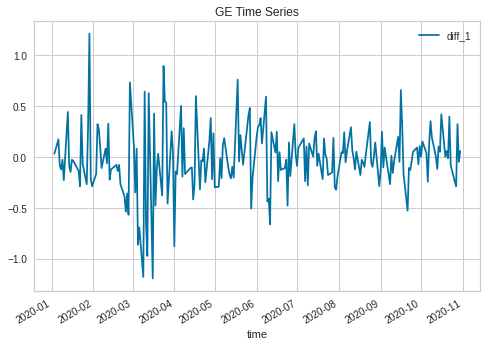

In [81]:
GE_df['diff_1'] = GE_df.close - GE_df.close.shift()
GE_df.plot(y='diff_1')
plt.title('GE Time Series')
plt.show()

want to investigate the PACF. Look at the PACF for both the initial and differenced time series:

Text(0.5, 1.0, 'S&P PACF')

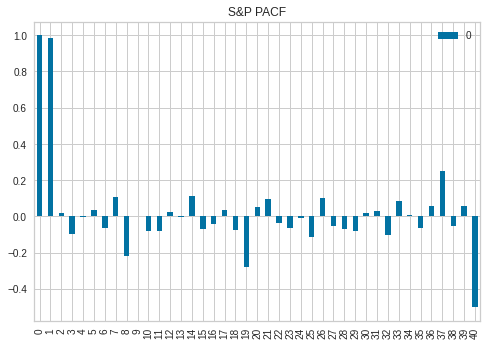

In [82]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(GE_df.close))
x_acf.plot(kind='bar')
plt.title("S&P PACF")

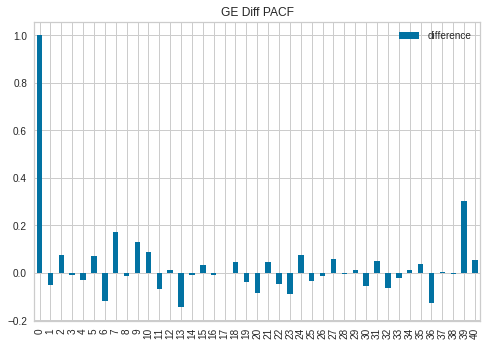

In [83]:
x_acf = pd.DataFrame(pacf(GE_df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("GE Diff PACF")
plt.legend(['difference'])

Modeling

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.


In [84]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(GE_df.close, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  210
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -61.645
Method:                           css   S.D. of innovations              0.325
Date:                Mon, 30 Nov 2020   AIC                            127.290
Time:                        09:01:25   BIC                            133.984
Sample:                             1   HQIC                           129.996
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0215      0.022     -0.960      0.337      -0.065       0.022
Residuals Description
count    2.100000e+02
mean     1.108854e-10
std      3.253008e-01
min     -1.172900e+00
25%     -1.660005e-01

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [85]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(GE_df.close, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                  211
Model:                     ARMA(1, 0)   Log Likelihood                 -63.925
Method:                       css-mle   S.D. of innovations              0.324
Date:                Mon, 30 Nov 2020   AIC                            133.850
Time:                        09:01:25   BIC                            143.906
Sample:                             0   HQIC                           137.915
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.7883      1.760      4.994      0.000       5.339      12.238
ar.L1.close     0.9909      0.008    127.170      0.000       0.976       1.006
                                    Roots       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [86]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(GE_df.close, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                  211
Model:                     ARMA(1, 1)   Log Likelihood                 -63.768
Method:                       css-mle   S.D. of innovations              0.324
Date:                Mon, 30 Nov 2020   AIC                            135.537
Time:                        09:01:25   BIC                            148.944
Sample:                             0   HQIC                           140.956
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.8242      1.799      4.906      0.000       5.299      12.350
ar.L1.close     0.9916      0.007    132.832      0.000       0.977       1.006
ma.L1.close    -0.0360      0.064     -0.560    

On model 1,0,1 the constant is aprox 8.8242, the AR coef 0.9916 - each day is approximately is equal to the previous day's value. The moving avg term is approx 0.0360, meaning that by incorporating the moving average term in the model, the error present in the model will be reduced by about 4% per day. The moving average part indicates that the regression error is actually a linear combination of error terms whose values occurred both in the current time lag and at various times in the past.

In [87]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(GE_df.close, order=(0,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  210
Model:                 ARIMA(0, 1, 5)   Log Likelihood                 -60.628
Method:                       css-mle   S.D. of innovations              0.323
Date:                Mon, 30 Nov 2020   AIC                            135.256
Time:                        09:01:25   BIC                            158.686
Sample:                             1   HQIC                           144.728
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0215      0.023     -0.939      0.348      -0.066       0.023
ma.L1.D.close    -0.0382      0.071     -0.539      0.590      -0.177       0.101
ma.L2.D.close     0.0597      0.078     

In [88]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(GE_df.close, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                  209
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -63.303
Method:                       css-mle   S.D. of innovations              0.323
Date:                Mon, 30 Nov 2020   AIC                            134.606
Time:                        09:01:26   BIC                            147.975
Sample:                             2   HQIC                           140.011
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0005      0.000      1.422      0.155      -0.000       0.001
ar.L1.D2.close    -0.0554      0.069     -0.802      0.423      -0.191       0.080
ma.L1.D2.close    -1.0000      0.015

The p-values are a way of approximating the likelihood that the coefficient has a significant effect on your outcome. But again, it is formally a probability of more extreme results. It allows to craft the 95% confidence interval for that coefficient. If 0 is within that interval, then that coefficient is often considered to be potentially unnecessary.

The log-likelihood is a log of the likelihood that the given model would generate the data that we see. The closer to 0, the higher the probability that we can predict the outcome with my given model.

What I can tell from these models, however, is that the outcomes aren't great. There isn't a huge difference in performance across the models, and they all generally seem pretty weak.

RESIDUALS:
- residuals are what is left over when you build your model; they're the difference between your prediction and the observed quantity. In time series, residuals are typically pretty important. I want my residuals to be random and normally distributed. That's the assumption made about errors in linear modeling.

Text(0.5, 1.0, 'Histogram of Residuals')

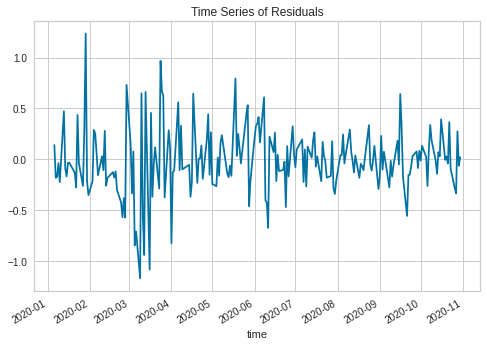

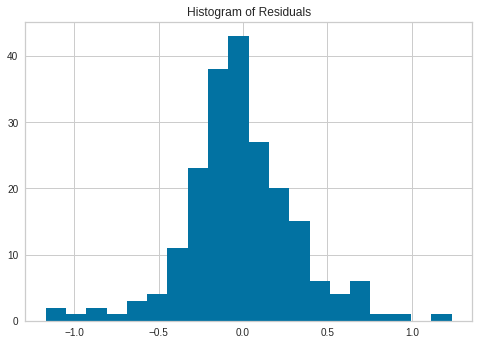

In [89]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [90]:
start=pd.Timestamp('2020-01-01', tz=NY).isoformat()
end=pd.Timestamp('2020-10-30', tz=NY).isoformat()

In [91]:
#!pip install pmdarima
#!ypip3 uninstall statsmodels
#!pip3 install numpy scipy patsy pandas
#!pip3 install statsmodels

In [98]:
ticker = 'GE'

In [92]:
import pmdarima as pm 
from pmdarima.model_selection import train_test_split
import statsmodels.api as sm

In [93]:
y = GE_df[["close"]]
y_train, y_test = train_test_split(y)

n_train = len(y_train)
n_test = len(y_test)

#train_dates = GE_df["start"][:n_train]
#test_dates = GE_df["end"][n_train:]

In [95]:
model = pm.auto_arima(y_train, m=4, suppress_warnings=True, trace=True)
forecast = model.predict(n_test)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=132.784, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=124.257, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=127.299, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=127.400, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=123.762, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=126.025, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=126.001, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=125.466, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=125.588, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=126.993, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4]          
Total fit time: 2.250 seconds


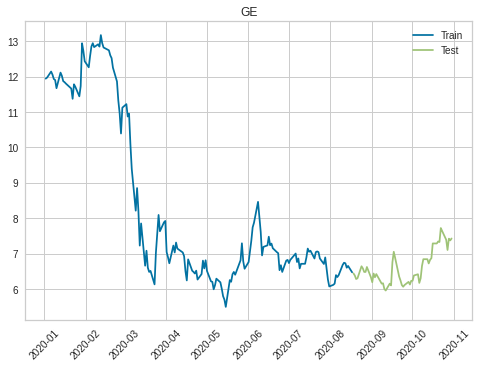

In [99]:
plt.plot(y_train, label="Train")
plt.plot( y_test, label="Test")
plt.plot(label="Predicted")
plt.xticks(rotation=45)
plt.title(ticker)
plt.legend()
plt.show()


too perfect, some kind of data leakage. I gotta work on it more and improve and change and make it better. I was excited about the project, eventually I want to trade out of here buiding an entire trading algo based on indicators. And the best thing about it, that anyone can use the algorithm and refine it to their taste with a cookbook in their hands.

This is an amazing product to predict the price move for the stocks, a person is interested in with the help of Alpaca API keys or any other APIs which provide the stock market data. I chose Alpaca because it gives away the data for free!

 I created an unique and very valuable cookbook to extract the data from API and to get the financial metrics, which were the biggest challenge and asset to this project. These metrics are priceless, first of all it took a very long time to get them, you should understand the life of the market to know which metrics to choose and how each of them work, what params each of them need for their execution. Average people don't know what to look at, how to choose stocks based on their financial metric strengths and I'm giving away the 'secret components' to anyone who's willing to understand the market game. All you need to know to make money is to know how the market works, and it works based on its metrics and psychology.